# **Descrição do Problema:**
Construção de um modelo preditivo que analise o risco de crédito dos clientes e previsão da probabilidade de inadimplência com base em seus dados históricos.

# **Coleta e Preparação dos Dados**
Fonte de Dados:
Usaremos o conjunto de dados Credit Scoring.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [6]:
# Carregar os dados
url = 'https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv'
df = pd.read_csv(url)

# Visualizar as primeiras linhas do dataframe
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


# **Exploração de Dados (EDA)**
Análise Exploratória de Dados:

In [13]:
# Informações gerais sobre o dataframe
df.info()

# Estatísticas descritivas
df.describe()

# Verificar valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniority  4455 non-null   int64
 2   Home       4455 non-null   int64
 3   Time       4455 non-null   int64
 4   Age        4455 non-null   int64
 5   Marital    4455 non-null   int64
 6   Records    4455 non-null   int64
 7   Job        4455 non-null   int64
 8   Expenses   4455 non-null   int64
 9   Income     4455 non-null   int64
 10  Assets     4455 non-null   int64
 11  Debt       4455 non-null   int64
 12  Amount     4455 non-null   int64
 13  Price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


Status       0
Seniority    0
Home         0
Time         0
Age          0
Marital      0
Records      0
Job          0
Expenses     0
Income       0
Assets       0
Debt         0
Amount       0
Price        0
dtype: int64

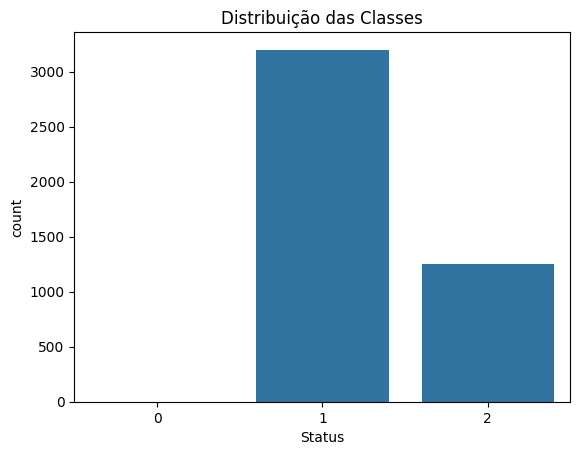

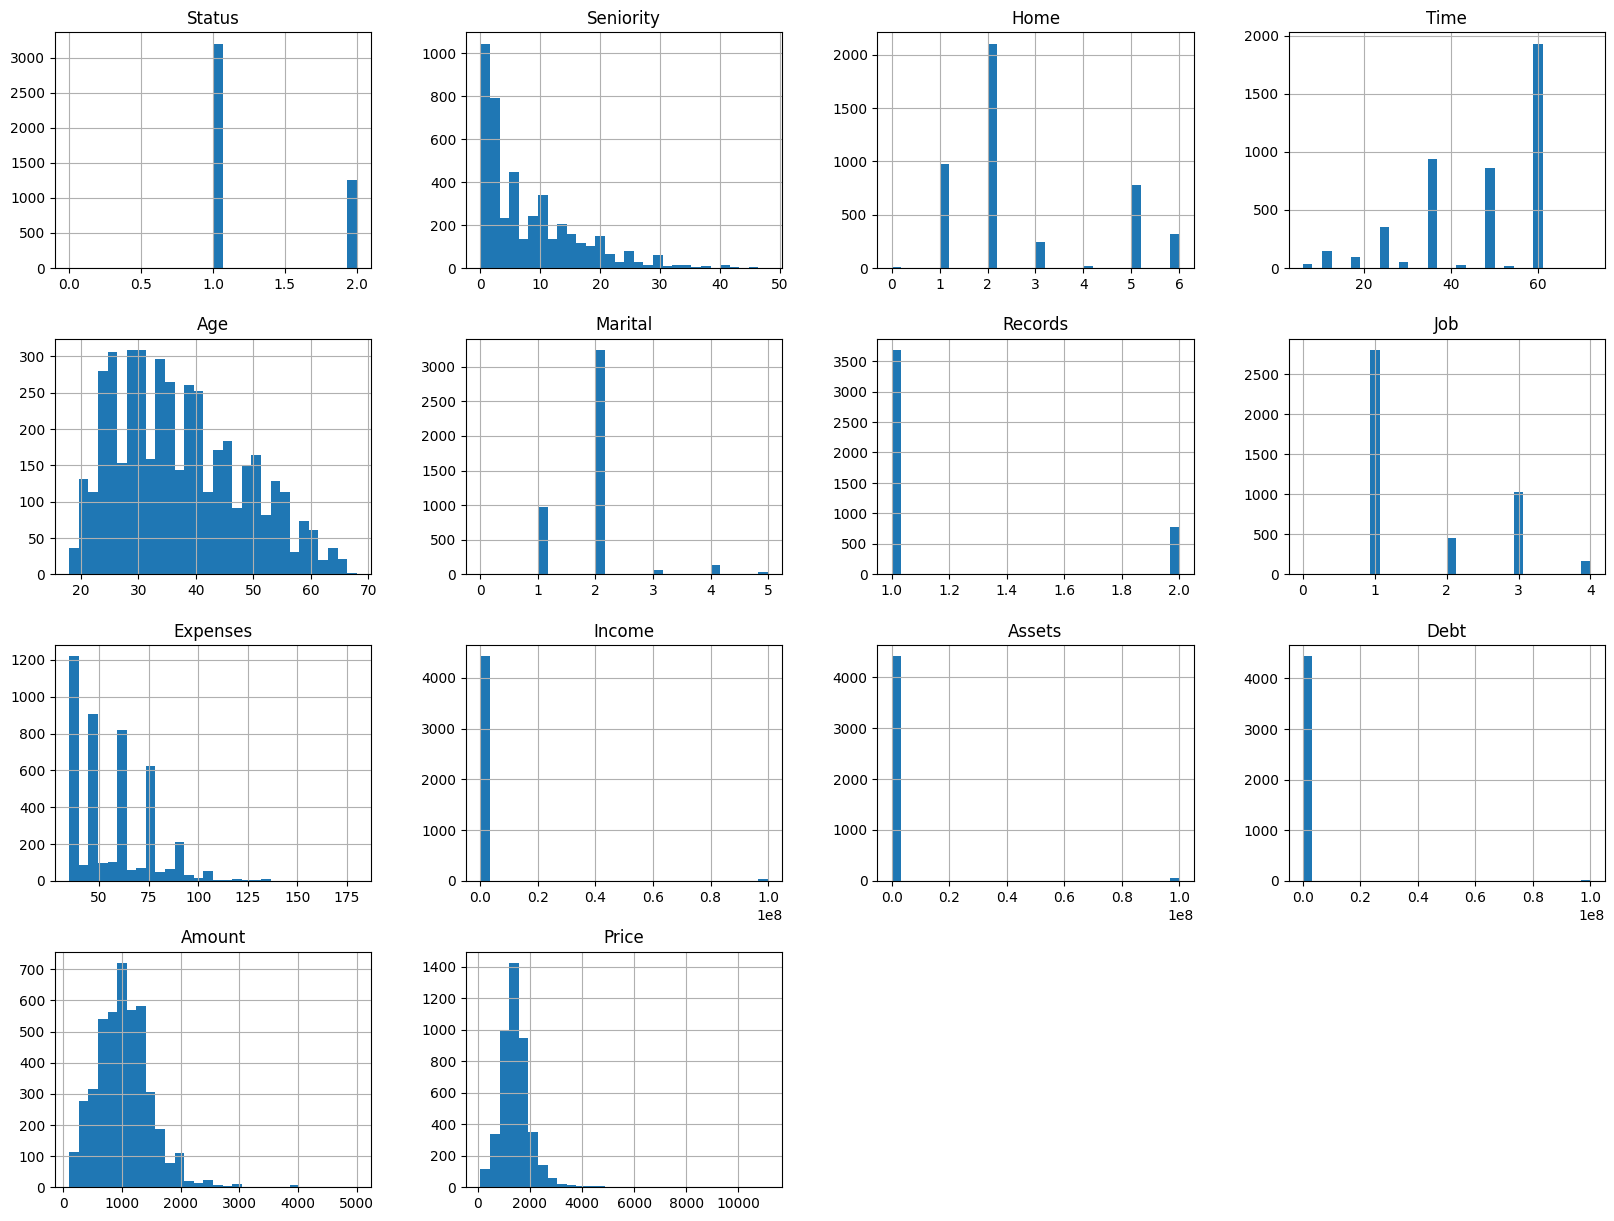

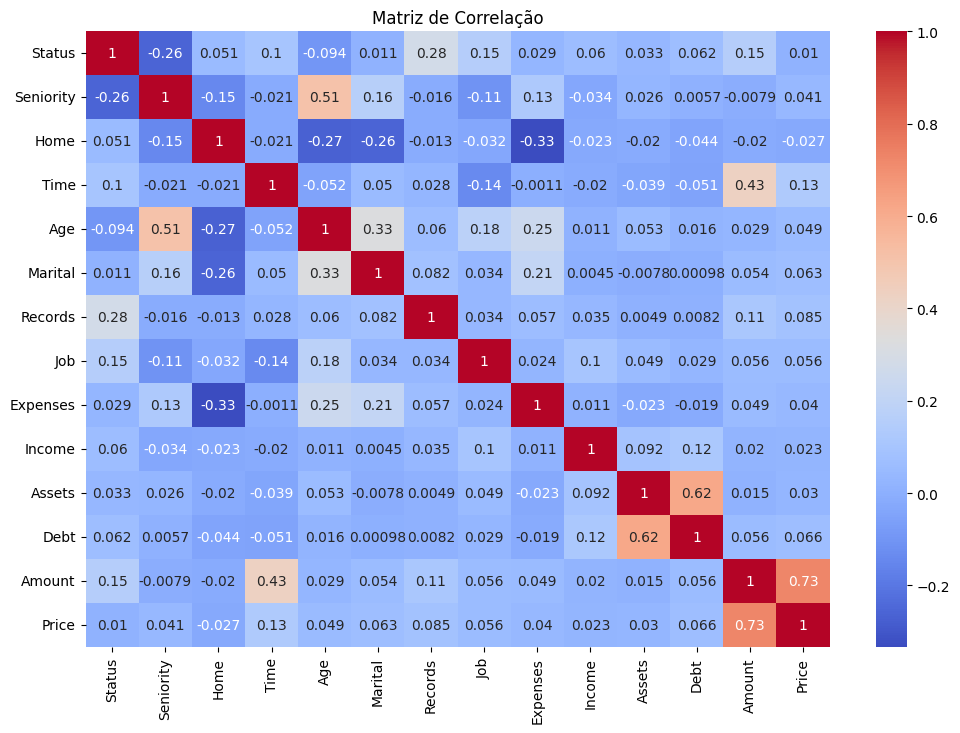

In [14]:
# Distribuição das classes
sns.countplot(x='Status', data=df)
plt.title('Distribuição das Classes')
plt.show()

# Histogramas das variáveis numéricas
df.hist(bins=30, figsize=(20,15))
plt.show()

# Correlação entre as variáveis
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# **Preparação dos Dados**
Limpeza e Transformação dos Dados:

In [15]:
# Remover ou imputar valores nulos (se necessário)
df.dropna(inplace=True)

# Codificação de variáveis categóricas
df = pd.get_dummies(df, drop_first=True)

# Dividir os dados em variáveis independentes (X) e dependente (y)
X = df.drop('Status', axis=1)
y = df['Status']

# Substituir valores de 2 para 1 e 1 para 0
y = y.replace({2: 1, 1: 0})

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Modelagem**
Treinamento do Modelo:

In [16]:
# Treinamento do modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


# **Avaliação do Modelo**
Métricas de Avaliação:

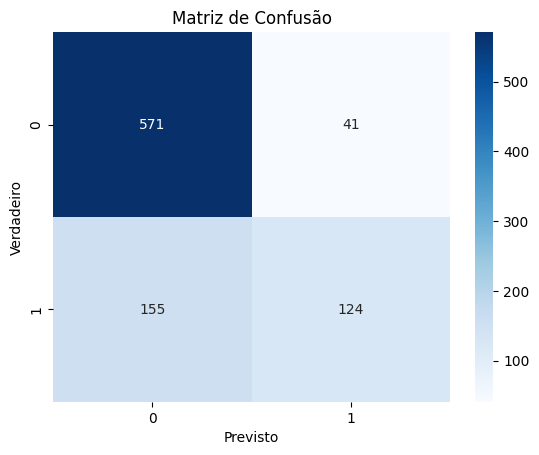

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       612
           1       0.75      0.44      0.56       279

    accuracy                           0.78       891
   macro avg       0.77      0.69      0.71       891
weighted avg       0.78      0.78      0.76       891



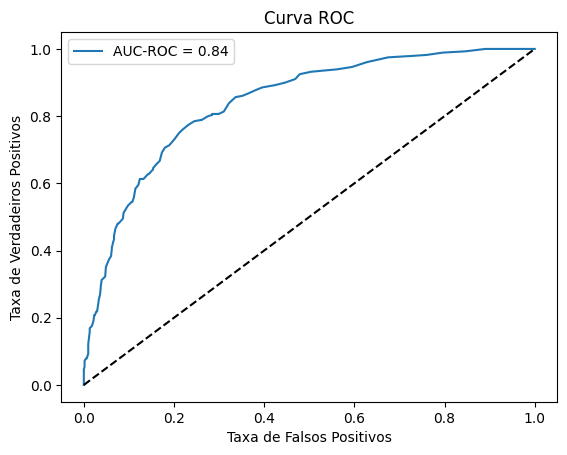

In [17]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

# Relatório de classificação
print(classification_report(y_test, y_pred))

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC-ROC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()


# **Documentação**
**Descrição e Resultados do Projeto:**

Definição do Problema:

**Objetivo:** Prever a inadimplência dos clientes com base em suas informações históricas.

**Exploração de Dados:**
Estatísticas descritivas e visualizações das distribuições dos dados.
Correlações entre as variáveis.

**Preparação dos Dados:**
Limpeza de dados e codificação de variáveis categóricas.
Divisão dos dados em conjuntos de treino e teste.
Padronização dos dados.

**Modelagem:**
Uso do modelo Random Forest para prever inadimplência.

**Avaliação do Modelo:**
Relatório de classificação, matriz de confusão e AUC-ROC para avaliar a performance do modelo.

# **Conclusão**

O modelo de Random Forest apresentou uma performance satisfatória na previsão de inadimplência dos clientes, com uma AUC-ROC de 0.84. Esta métrica indica que o modelo possui uma capacidade robusta de distinguir entre clientes que pagam seus créditos em dia e aqueles que podem apresentar maior risco de inadimplência. Esses resultados sugerem que o modelo pode ser uma ferramenta eficaz para apoiar decisões na avaliação de crédito.